In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.preprocessing import StandardScaler # normalização de dados
from sklearn.model_selection import train_test_split # dividir dados entre treinmaneto e teste
from tensorflow import keras

2023-06-04 14:29:56.691186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 14:29:57.527474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-04 14:29:57.527506: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-04 14:29:57.599841: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-04 14:30:01.121958: W tensorflow/stream_executor/platform/de

In [45]:
dataset_petr4 = pd.read_csv("PETR4.csv")
dataset_brent = pd.read_csv("brent_oil_futures.csv")


In [46]:
dataset_petr4 = dataset_petr4.dropna()

In [47]:
dataset_brent = dataset_brent.dropna()

In [48]:
dataset_brent = dataset_brent.iloc[:-106,:]

In [49]:
dataset = pd.merge(dataset_petr4,dataset_brent, on="Date")

In [50]:
rename_colums = {
    "Price_x":"Price_petr4",
    "Price_y":"Price_brent",
    "Open_y":"Open_brent",
    "Vol._y":"Vol._brent"
}
dataset = dataset.rename(columns=rename_colums)

In [51]:
volumes = []
for volume in dataset['Vol._brent']:
    if 'M' in volume:
        volume = float(volume.replace('M',''))*1000000
    elif 'K' in volume:
        volume = float(volume.replace('K',''))*1000
    volumes.append(volume)

In [52]:
y = dataset["Price_petr4"]

In [53]:
dataset['Vol._brent'] = pd.Series(volumes)

In [54]:
dataset_features = ['Price_brent', "Open_brent", "Vol._brent"]
X = dataset[dataset_features]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation = "relu"))
model.add(keras.layers.Dense(30, activation ="relu"))
model.add(keras.layers.Dense(1))  


2023-06-04 15:19:07.271620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-04 15:19:07.277193: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-04 15:19:07.283129: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-KBF6PUFT): /proc/driver/nvidia/version does not exist
2023-06-04 15:19:07.355477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error']
)
model.fit(
 X_train,
 y_train,
 epochs = 100,
 batch_size = 32
)



Epoch 1/100
52/52 [==============================] - 3s 6ms/step - loss: 28592.8965 - mean_absolute_error: 108.2993
Epoch 2/100
52/52 [==============================] - 0s 7ms/step - loss: 159.3186 - mean_absolute_error: 10.0050
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 80.3318 - mean_absolute_error: 7.2391
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 79.8971 - mean_absolute_error: 7.2217
Epoch 5/100
52/52 [==============================] - 1s 10ms/step - loss: 65.6361 - mean_absolute_error: 6.5800
Epoch 6/100
52/52 [==============================] - 0s 9ms/step - loss: 68.1324 - mean_absolute_error: 6.6755
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 80.0487 - mean_absolute_error: 7.2600
Epoch 8/100
52/52 [==============================] - 0s 8ms/step - loss: 95.8436 - mean_absolute_error: 7.9636
Epoch 9/100
52/52 [==============================] - 0s 5ms/step - loss: 66.9037 - mean_absolute_error: 

In [70]:
print("The predictions are")
y_predicted = model.predict(X_test)
print(y_predicted)

The predictions are
23/23 [==============================] - 1s 7ms/step
[[15.240997 ]
 [18.438751 ]
 [10.504669 ]
 [20.900177 ]
 [19.292267 ]
 [20.773224 ]
 [18.029572 ]
 [18.573029 ]
 [10.365021 ]
 [11.5017395]
 [12.897247 ]
 [ 8.053864 ]
 [12.474396 ]
 [10.187286 ]
 [12.032013 ]
 [12.975372 ]
 [11.221466 ]
 [ 9.157379 ]
 [14.444122 ]
 [19.03299  ]
 [10.402618 ]
 [10.156036 ]
 [18.35379  ]
 [13.632599 ]
 [11.002228 ]
 [12.072052 ]
 [11.2742   ]
 [18.553986 ]
 [ 7.2508845]
 [12.844513 ]
 [18.4534   ]
 [18.371368 ]
 [13.291779 ]
 [11.379669 ]
 [11.8454895]
 [18.195099 ]
 [ 9.119904 ]
 [18.922638 ]
 [ 9.7361145]
 [11.40506  ]
 [16.647858 ]
 [19.91092  ]
 [14.489044 ]
 [18.358185 ]
 [10.640411 ]
 [13.222443 ]
 [15.428497 ]
 [15.539825 ]
 [18.169708 ]
 [12.282013 ]
 [15.0017395]
 [18.12326  ]
 [10.8992   ]
 [11.104279 ]
 [17.746368 ]
 [12.533966 ]
 [17.397247 ]
 [11.378693 ]
 [19.043732 ]
 [16.119415 ]
 [16.577911 ]
 [13.171661 ]
 [11.591583 ]
 [16.323029 ]
 [ 9.575958 ]
 [18.668732 ]
 [1

In [71]:
from sklearn.metrics import mean_absolute_error
print("MAE")
mae = mean_absolute_error(y_test, y_predicted)
print("Value:",mae)

MAE
Value: 4.031540428351004


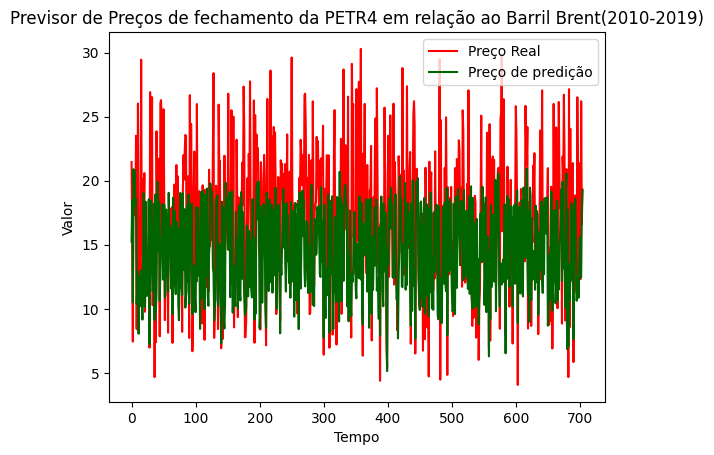

In [72]:
plt.plot(pd.array(y_test), color = 'red',label = 'Preço Real')
plt.plot(y_predicted, color = 'darkgreen', label="Preço de predição")
plt.title('Previsor de Preços de fechamento da PETR4 em relação ao Barril Brent(2010-2019)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()